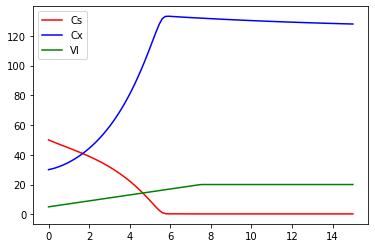

           cs          cx         Vl
0   50.000000   30.000000   5.000000
1   49.127828   30.466146   5.303030
2   48.286667   31.040091   5.606061
3   47.467165   31.716702   5.909091
4   46.661471   32.492664   6.212121
5   45.862856   33.366116   6.515152
6   45.065446   34.336386   6.818182
7   44.264014   35.403797   7.121212
8   43.453825   36.569521   7.424242
9   42.630515   37.835479   7.727273
10  41.789996   39.204257   8.030303
11  40.928381   40.679049   8.333333
12  40.041922   42.263616   8.636364
13  39.126964   43.962252   8.939394
14  38.179899   45.779759   9.242424
15  37.197140   47.721435   9.545455
16  36.175085   49.793056   9.848485
17  35.110101   52.000865  10.151515
18  33.998505   54.351562  10.454545
19  32.836549   56.852290  10.757576
20  31.620412   59.510613  11.060606
21  30.346202   62.334495  11.363636
22  29.009956   65.332253  11.666667
23  27.607659   68.512497  11.969697
24  26.135272   71.884041  12.272727
25  24.588780   75.455760  12.575758
2

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd


# Enter qsmax in g/g*h
# Enter Ks in g/l
# Enter µmax in 1/h
# Enter entrance substrate concentration
# enter inlet flow in l/h
# enter the end vloume of the reactor

qsmax = 0.2
Ks = 1
µmax = 0.5
csf = 50
Fin = 2
Vend = 20




def model (y,t):
    
    cs = y[0]
    
    cx = y[1]
    
    Vl = y[2]
    
    qs = qsmax* cs/(cs + Ks)

    µ = µmax*cs/(cs + Ks)
    
    dcsdt = Fin/Vl * (csf - cs) - qs*cx
    
    dcxdt = cx*(µ - Fin/Vl)
    
    if Vl < Vend:
        dVldt = Fin  # eigentlich löst man hier ja keine DGL auf weil Fin nicht mit Vl definiert ist, was passiert bei odeint?
        
    else:
        dVldt = 0
        
        
        
    return (dcsdt, dcxdt, dVldt)


t = np.linspace(0, 15, 100)

y0 = [50, 30, 5]



result = odeint(model, y0, t)

cs = result[:, 0]
cx = result[:, 1]
Vl = result[:, 2]


    

plt.plot(t, cs, "r-")
plt.plot(t, cx, "b-")
plt.plot(t, Vl, "g-")
plt.legend(["Cs", "Cx", "Vl"])
plt.show()


pd.set_option('display.max_rows', 200)
print(pd.DataFrame(result, columns= ("cs", "cx", "Vl")))


    
    
    
    